# 특성 추가
- 주어진 특성 외에 이동평균, 이동분산, 최대치, 피크치 등을 추가하여 성능을 개선하는 방법
- 시계열 데이터 분석에서 자주 사용된다

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

## 데이터 읽기

(108, 2)


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


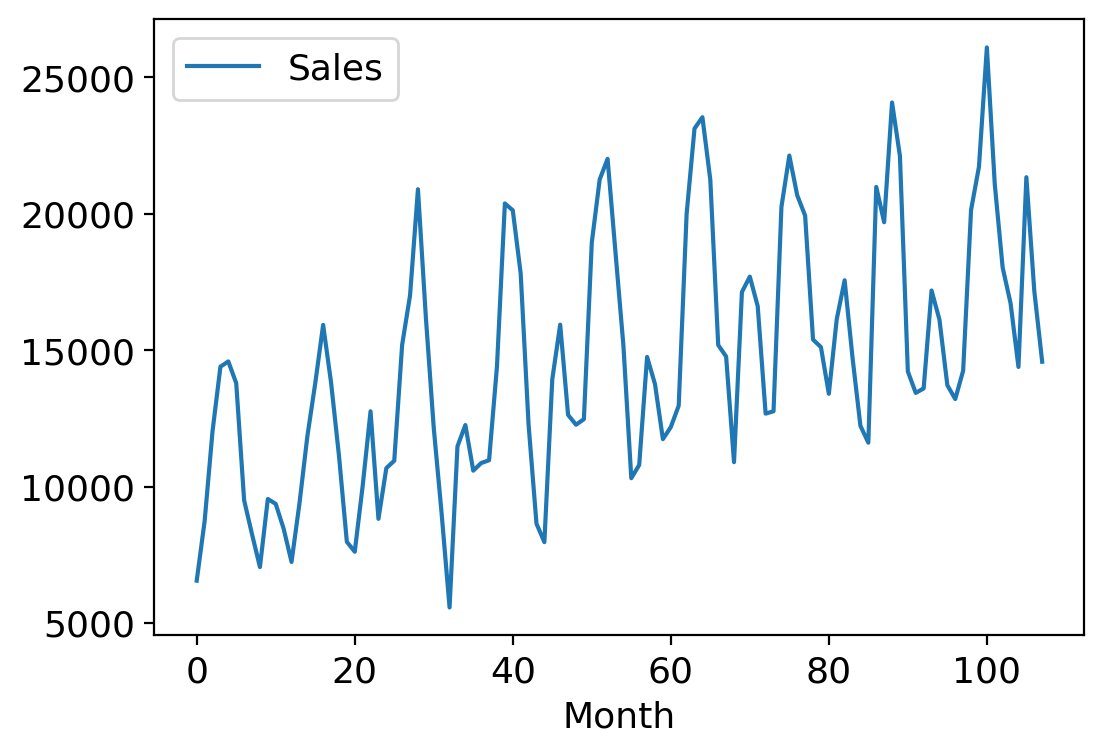

In [2]:
## 자동차 판매 데이터 읽기

data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/car_sales.csv")
print(data.shape)

data.plot()
plt.xlabel('Month')

data[:5]

## 이동평균, 이동분산 추가하기
- 윈도우 크기를 지정하고 이 윈도를 이동하면서 (sliding) 구간내 샘플의 평균, 분산 등을 추가한다
- min_periods=1 의 의미는 초기에 윈도우 크기가 6이 되지 않더라도 평균과 분산을 구하라는 뜻임
 - 분산을 구하려면 최소한 2개의 샘플이 있어야 하는데, 한 샘플만 있을 때는 0을 채우도록 했다

In [8]:
#df = data.copy()
#df['6-mean'] = df['Sales'].rolling(6, min_periods=1).mean()
#df['6-std'] = df['Sales'].rolling(6, min_periods=1).std().fillna(0)
#df[:8]




#12개월
df = data.copy()
df['12-mean'] = df['Sales'].rolling(12, min_periods=1).mean()
df['12-std'] = df['Sales'].rolling(12, min_periods=1).std().fillna(0)
df[:8]

,Month,Sales,12-mean,12-std
0,1960-01,6550,6550.000000,0.000000
1,1960-02,8728,7639.000000,1540.078569
2,1960-03,12026,9101.333333,2757.023274
3,1960-04,14395,10424.750000,3474.647932
4,1960-05,14587,11257.200000,3538.325692
5,1960-06,13791,11679.500000,3329.537911
6,1960-07,9498,11367.857143,3149.291107
7,1960-08,8251,10978.250000,3116.973246


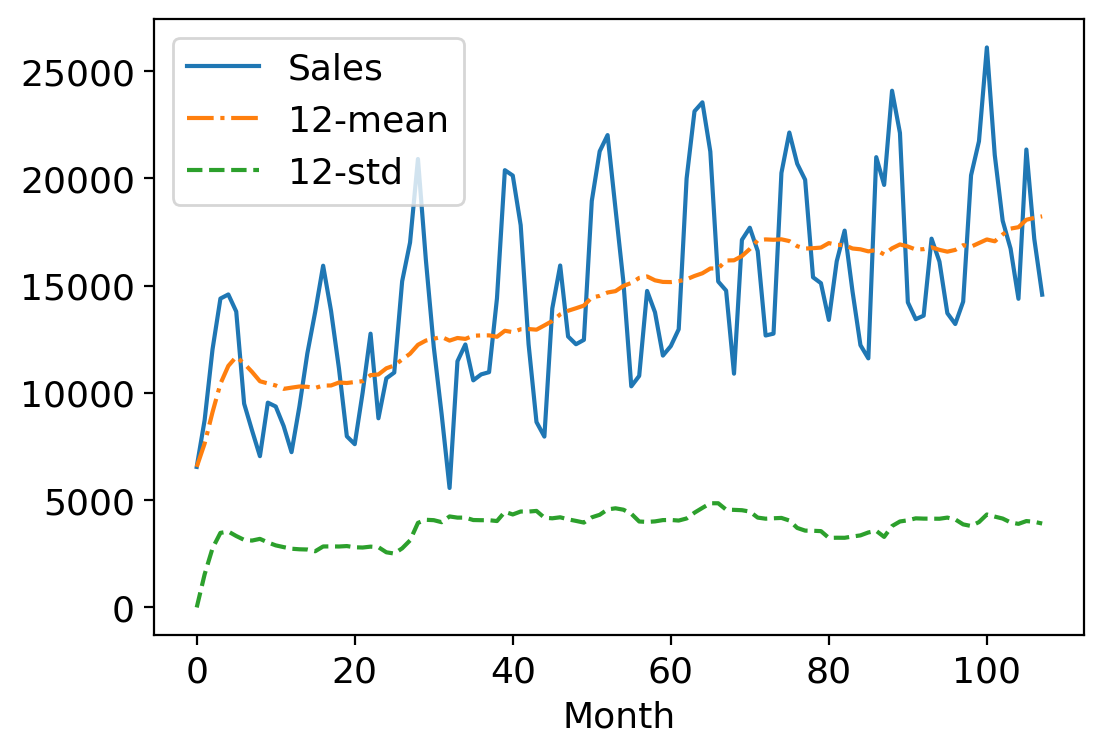

In [9]:
## 추가한 특성 그리기

#plt.plot(df['Sales'], label='Sales', ls='-')
#plt.plot(df['6-mean'], label='6-mean', ls='-.')
#plt.plot(df['6-std'], label='6-std', ls='--')
#plt.xlabel("Month")

#plt.legend()




#12개월치
plt.plot(df['Sales'], label='Sales', ls='-')
plt.plot(df['12-mean'], label='12-mean', ls='-.')
plt.plot(df['12-std'], label='12-std', ls='--')
plt.xlabel("Month")

plt.legend()


# 피크 발생 찾기

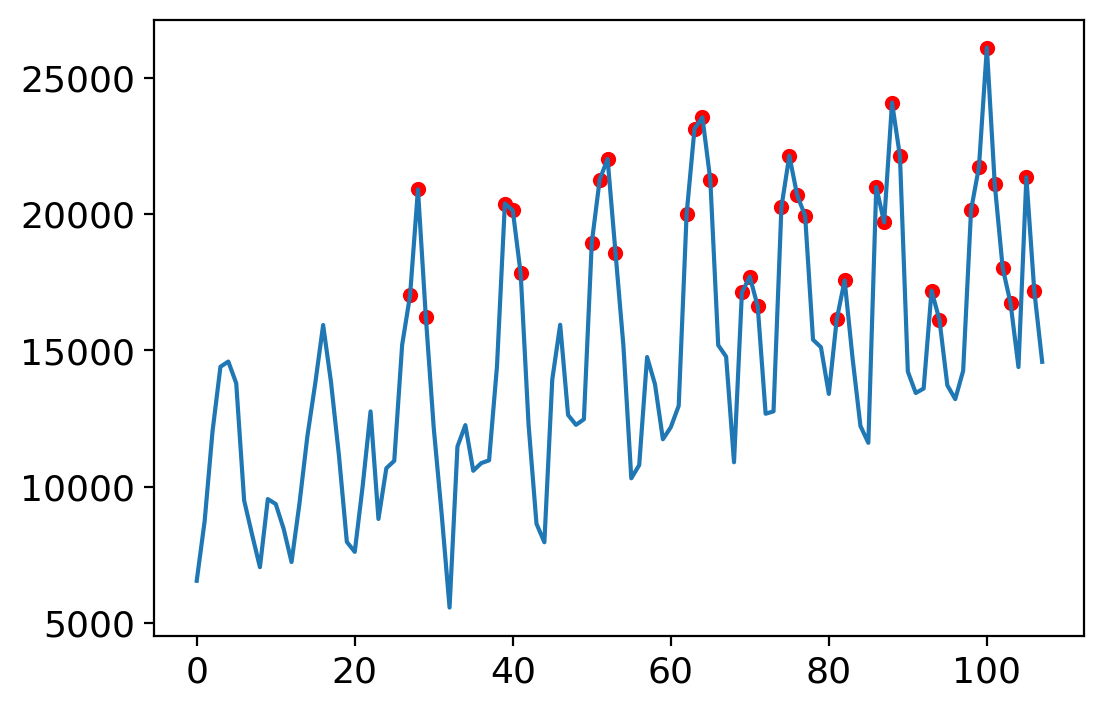

In [10]:
## 피크 발생 찾기
# 일정한 조건을 만족하는 값을 찾는다

df['peak-16'] = df['Sales'][df['Sales'] > 16000]
plt.plot(df.Sales)
plt.scatter(range(len(df)), df['peak-16'],c='r', s=20)

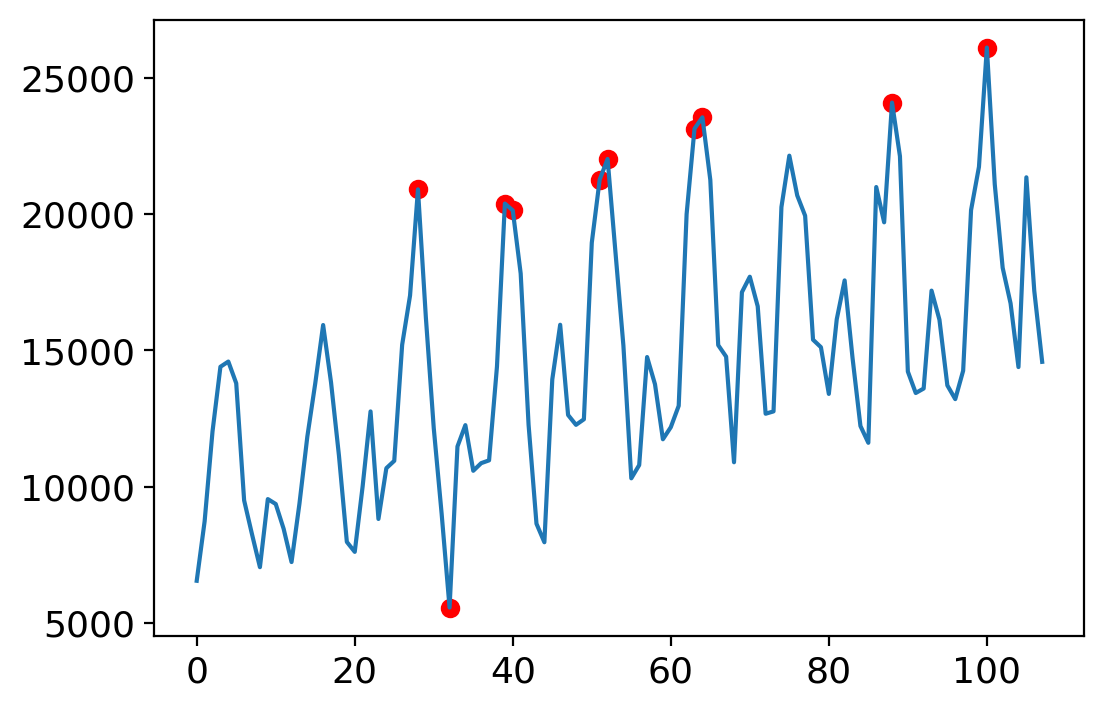

In [11]:
## 평균값을 기준으로 한 피크 발생 찾기

#df['peak-average'] = df['Sales'][np.abs(df['Sales']-df['6-mean']) > 6000]  #PEAK를 찾을떄, 평균치를 얼마나 벗어난 걸 찾는지 확인. abs는 절대값을 취해서 그 +,- 차이 모두 찾음
df['peak-average'] = df['Sales'][np.abs(df['Sales']-df['12-mean']) > 6000]
plt.plot(df.Sales)
plt.scatter(range(len(df)), df['peak-average'],c='r')

## 일정 구간 동안 피크 수 세기

Text(0.5, 0, 'Month')

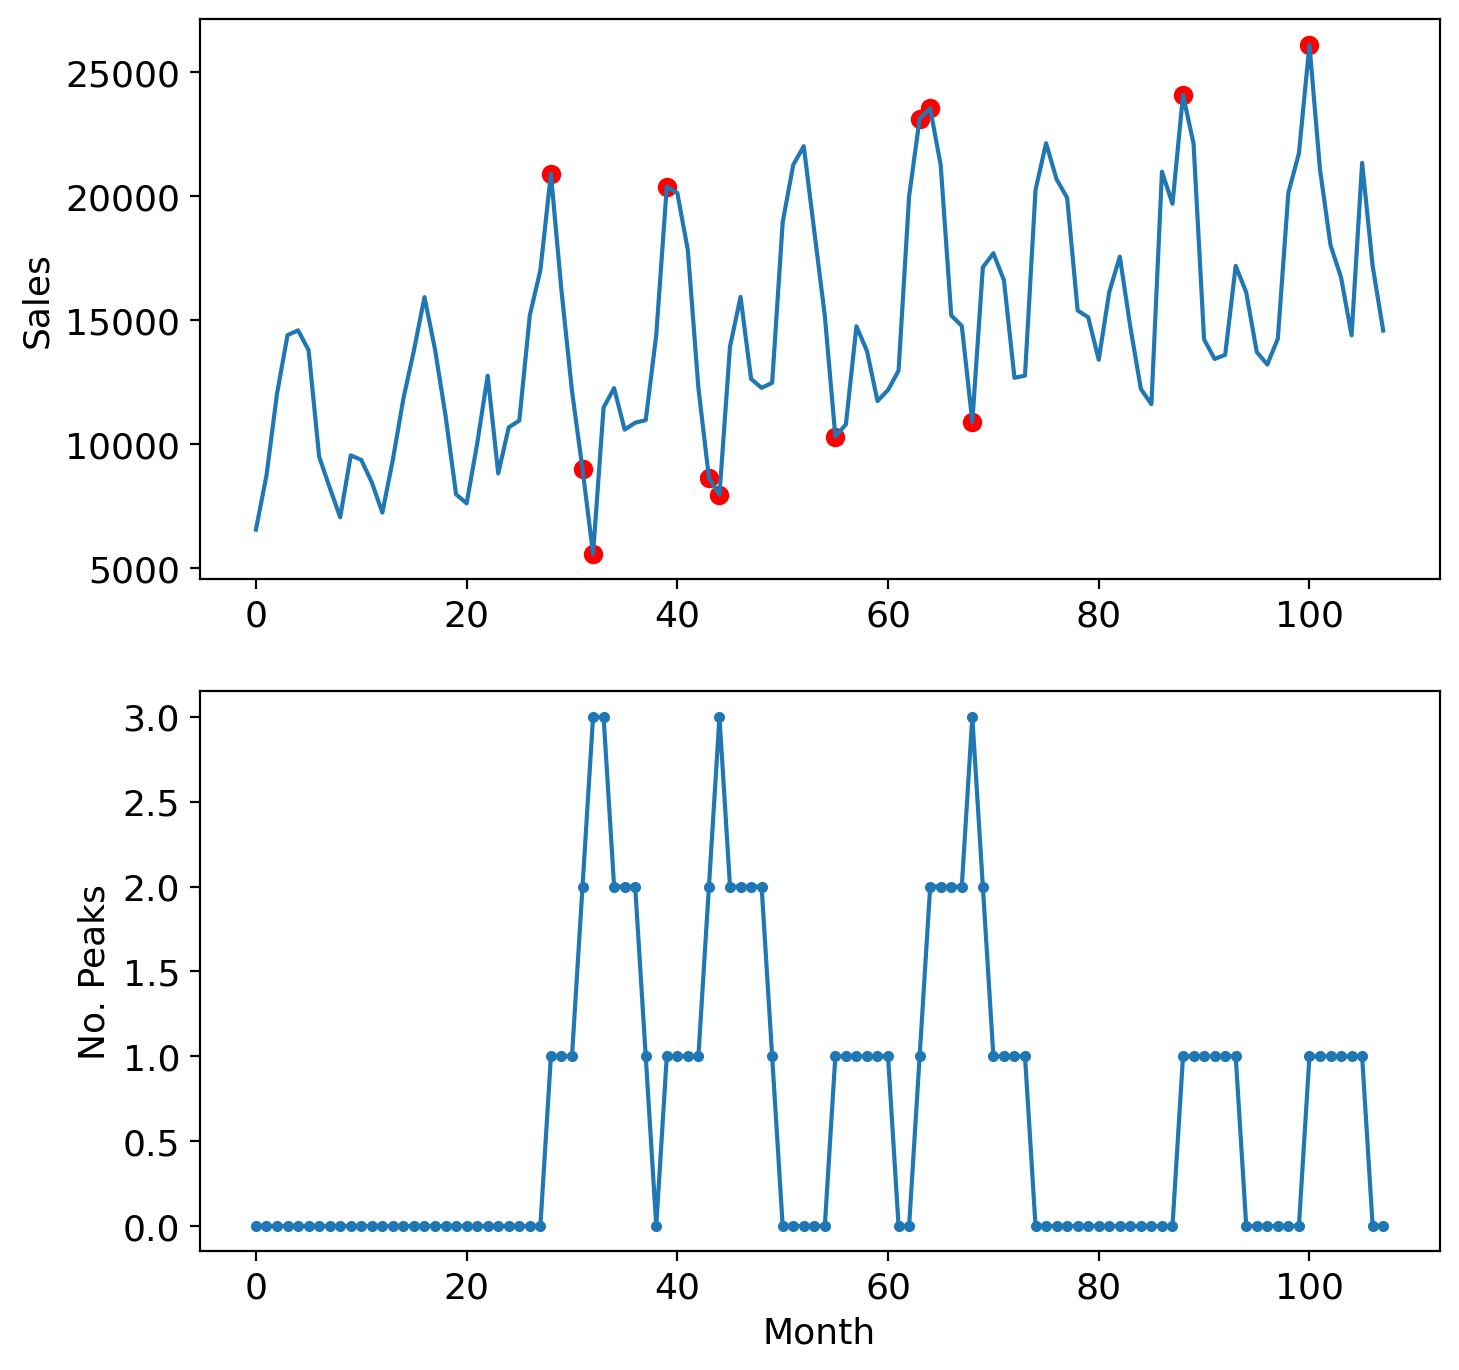

In [7]:
## 일정 구간 동안 피크 발생수를 세기

df['peak-count-6'] = df['peak-average'].rolling(6, min_periods=1).count()

f,(ax1, ax2) = plt.subplots(2, figsize=(8,8))
ax1.plot(df['Sales'])
ax1.scatter(range(len(df)), df['peak-average'],c='r')
ax2.plot(df['peak-count-6'], marker='.')  #Count를 찾아줌..
ax1.set_ylabel("Sales")
ax2.set_ylabel("No. Peaks")
ax2.set_xlabel("Month")

# (실습) 이동평균과 이동분산 변경

- 윈도우 크기를 w=8로 변경하여 특성을 추가하시오